<a href="https://colab.research.google.com/github/ccasadei/corso-ia/blob/master/02Classificazione/02K-NearestNeighbors/kNearestNeighbors01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbor
## Esercizio 1
**Author: Cristiano Casadei**

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# dati caricati da https://www.openml.org/d/28
X, Y = fetch_openml('optdigits', version=1, return_X_y=True, cache=True, as_frame=False)

# eseguo la codifica automatica delle label
labEnc = LabelEncoder()
Y_enc = labEnc.fit_transform(Y)

# divido in dataset train e test, usando un massimo di esempi per il train e di conseguenza il test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_enc, test_size=0.3, random_state=1234)

# eseguo la standardizzazione
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [3]:
# ciclo da 1 a 20 K
for K in range(1, 21):
    # eseguo la classificazione K-NN
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train_std, Y_train)

    # eseguo predizione e calcolo confidenza su train
    Y_pred_train = knn.predict(X_train_std)
    Y_pred_train_proba = knn.predict_proba(X_train_std)

    # eseguo predizione e calcolo confidenza su test
    Y_pred = knn.predict(X_test_std)
    Y_pred_proba = knn.predict_proba(X_test_std)

    # valutiamo il modello con le metriche messe a disposizione da SciKitLearn
    print("K:", K)
    print("Accuracy: TRAIN =", "{0:.4f}".format(accuracy_score(Y_train, Y_pred_train)),
          "- TEST =", "{0:.4f}".format(accuracy_score(Y_test, Y_pred)))
    print("NLogLike: TRAIN =", "{0:.4f}".format(log_loss(Y_train, Y_pred_train_proba)),
          "- TEST =", "{0:.4f}".format(log_loss(Y_test, Y_pred_proba)))

K: 1
Accuracy: TRAIN = 1.0000 - TEST = 0.9792
NLogLike: TRAIN = 0.0000 - TEST = 0.7170
K: 2
Accuracy: TRAIN = 0.9860 - TEST = 0.9745
NLogLike: TRAIN = 0.0167 - TEST = 0.4102
K: 3
Accuracy: TRAIN = 0.9878 - TEST = 0.9786
NLogLike: TRAIN = 0.0276 - TEST = 0.3573
K: 4
Accuracy: TRAIN = 0.9835 - TEST = 0.9763
NLogLike: TRAIN = 0.0356 - TEST = 0.2851
K: 5
Accuracy: TRAIN = 0.9835 - TEST = 0.9775
NLogLike: TRAIN = 0.0403 - TEST = 0.2524
K: 6
Accuracy: TRAIN = 0.9809 - TEST = 0.9733
NLogLike: TRAIN = 0.0474 - TEST = 0.1976
K: 7
Accuracy: TRAIN = 0.9809 - TEST = 0.9763
NLogLike: TRAIN = 0.0526 - TEST = 0.1801
K: 8
Accuracy: TRAIN = 0.9794 - TEST = 0.9745
NLogLike: TRAIN = 0.0563 - TEST = 0.1638
K: 9
Accuracy: TRAIN = 0.9781 - TEST = 0.9751
NLogLike: TRAIN = 0.0617 - TEST = 0.1469
K: 10
Accuracy: TRAIN = 0.9769 - TEST = 0.9757
NLogLike: TRAIN = 0.0662 - TEST = 0.1298
K: 11
Accuracy: TRAIN = 0.9769 - TEST = 0.9745
NLogLike: TRAIN = 0.0712 - TEST = 0.1333
K: 12
Accuracy: TRAIN = 0.9751 - TEST = 0

La cifra 3 è stata classificata come cifra 5


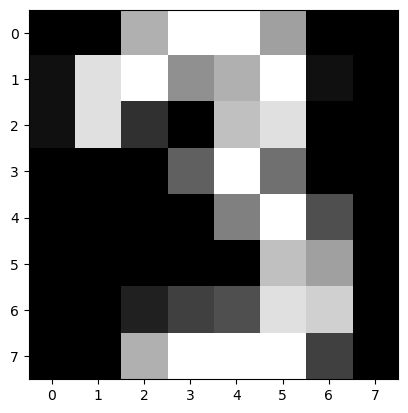

La cifra 7 è stata classificata come cifra 4


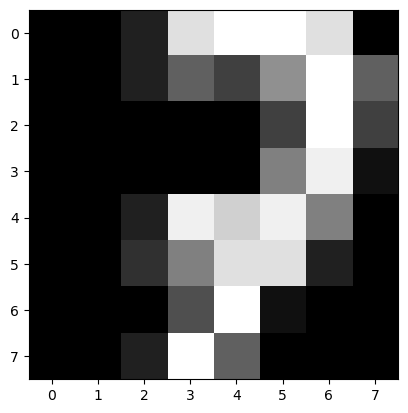

La cifra 3 è stata classificata come cifra 2


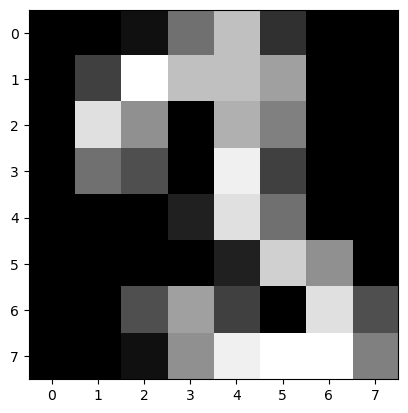

La cifra 9 è stata classificata come cifra 3


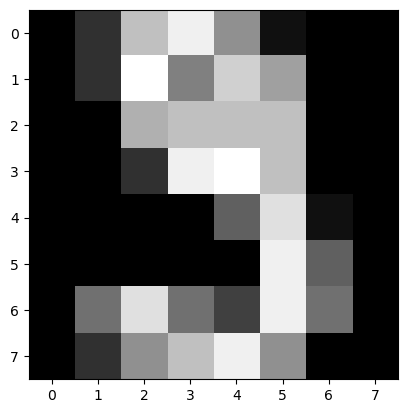

La cifra 9 è stata classificata come cifra 3


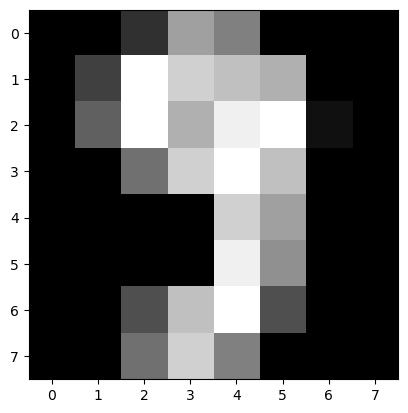

La cifra 2 è stata classificata come cifra 8


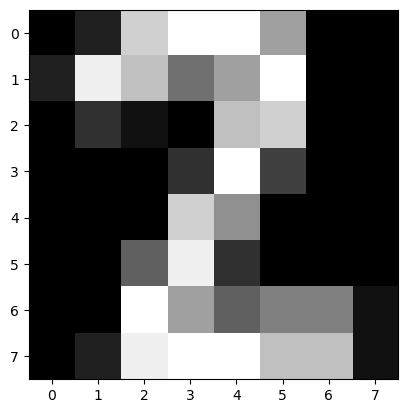

La cifra 4 è stata classificata come cifra 8


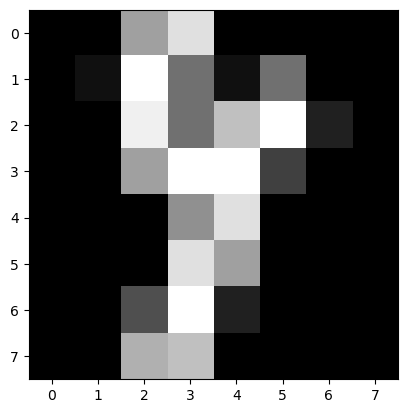

La cifra 5 è stata classificata come cifra 9


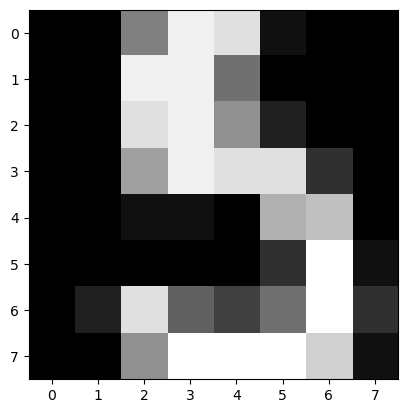

La cifra 1 è stata classificata come cifra 8


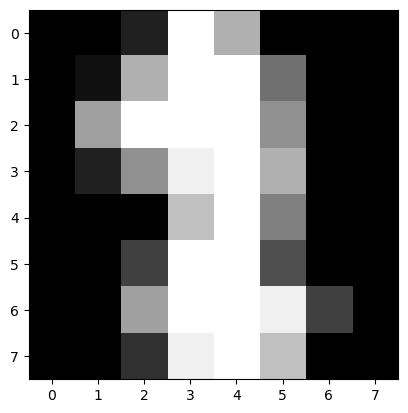

La cifra 9 è stata classificata come cifra 7


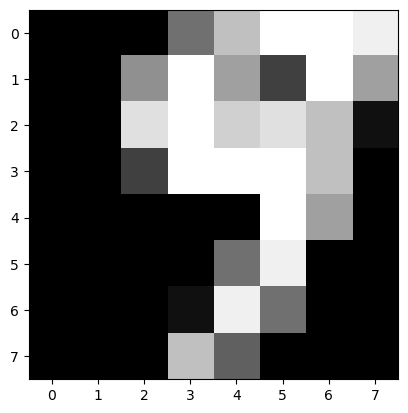

La cifra 3 è stata classificata come cifra 5


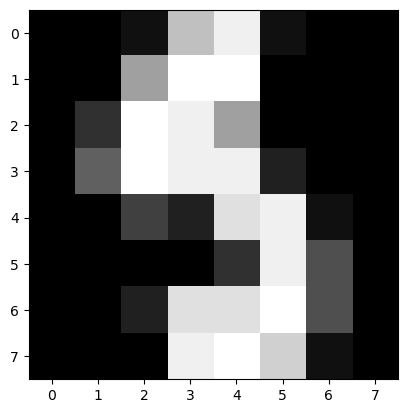

La cifra 9 è stata classificata come cifra 6


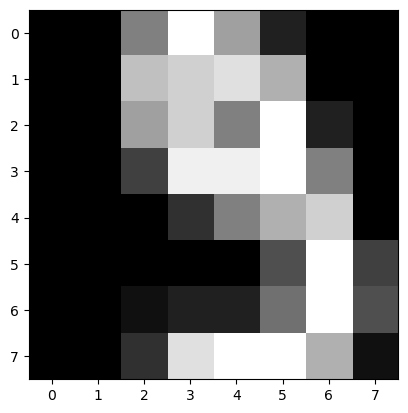

La cifra 5 è stata classificata come cifra 9


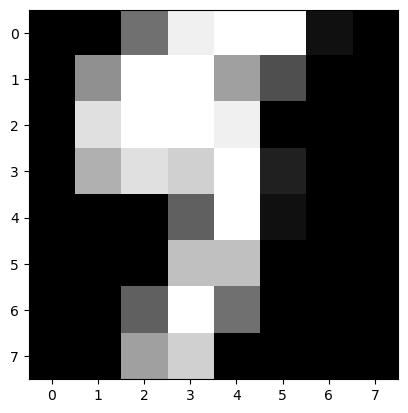

La cifra 3 è stata classificata come cifra 5


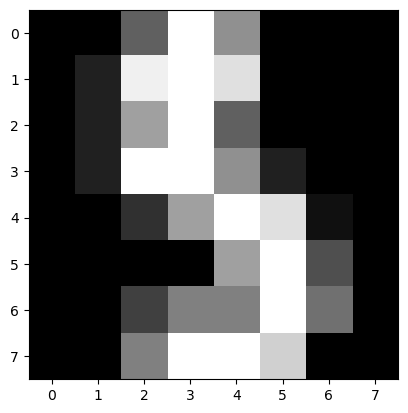

La cifra 8 è stata classificata come cifra 2


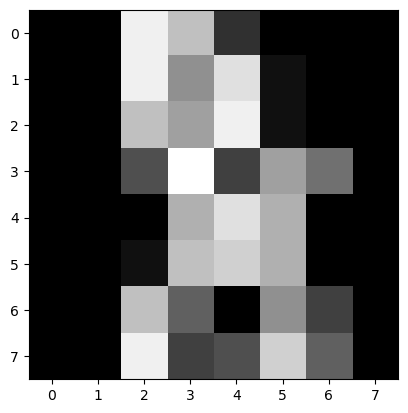

La cifra 3 è stata classificata come cifra 9


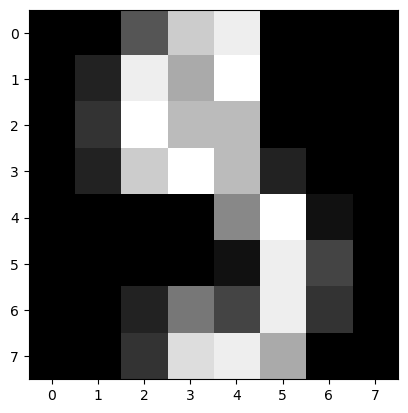

La cifra 9 è stata classificata come cifra 8


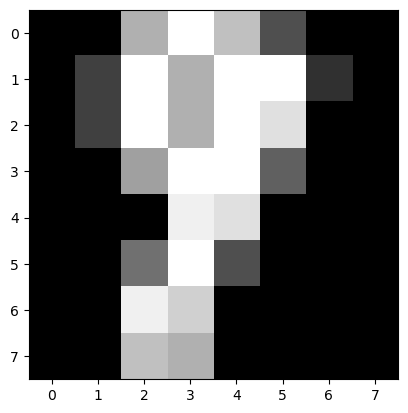

La cifra 3 è stata classificata come cifra 5


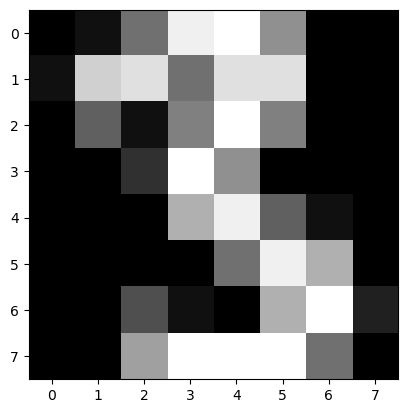

La cifra 9 è stata classificata come cifra 8


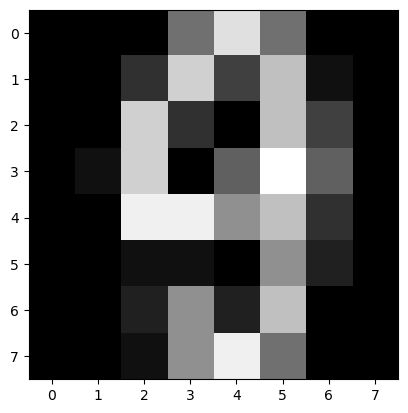

La cifra 9 è stata classificata come cifra 7


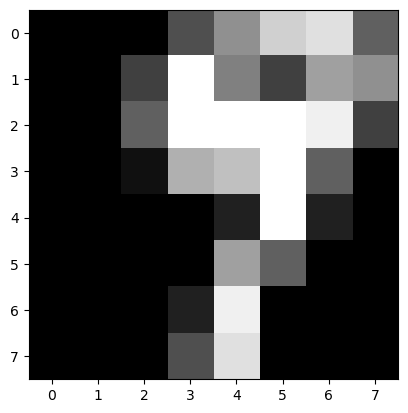

La cifra 8 è stata classificata come cifra 1


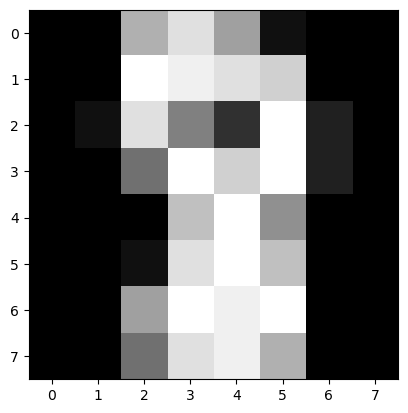

La cifra 5 è stata classificata come cifra 9


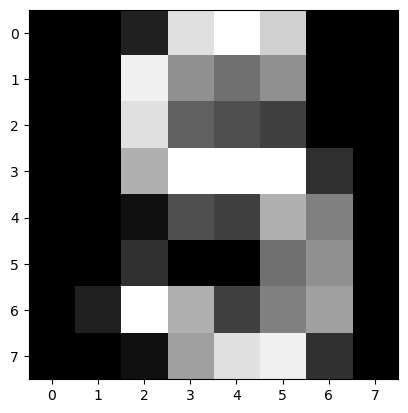

La cifra 4 è stata classificata come cifra 7


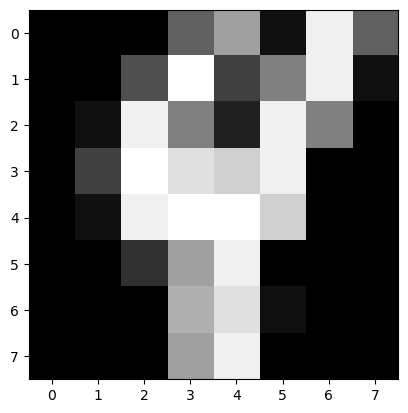

La cifra 5 è stata classificata come cifra 7


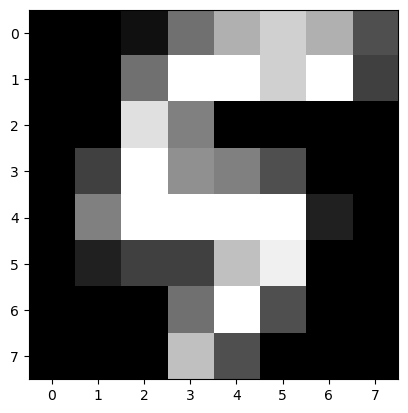

La cifra 9 è stata classificata come cifra 7


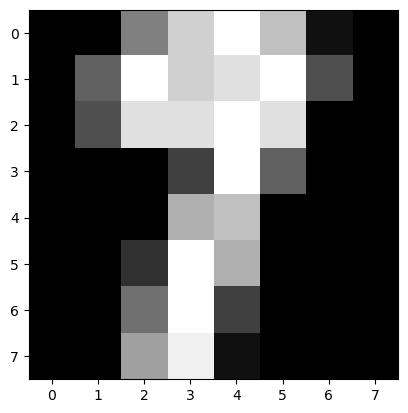

La cifra 9 è stata classificata come cifra 1


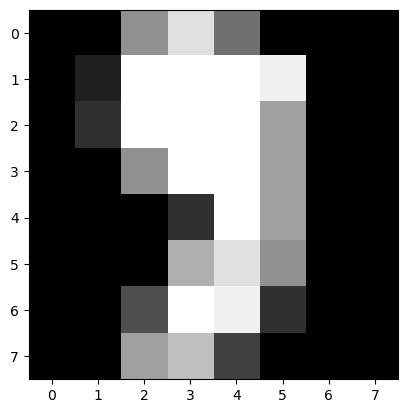

La cifra 3 è stata classificata come cifra 9


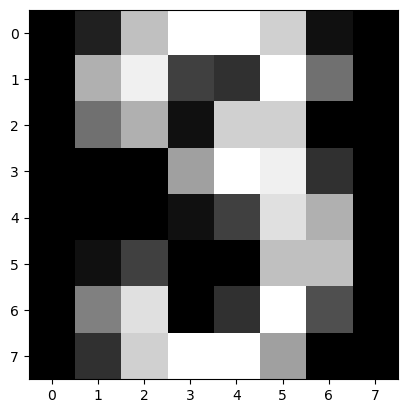

La cifra 9 è stata classificata come cifra 3


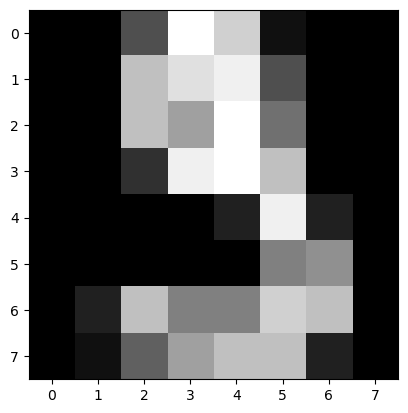

La cifra 4 è stata classificata come cifra 9


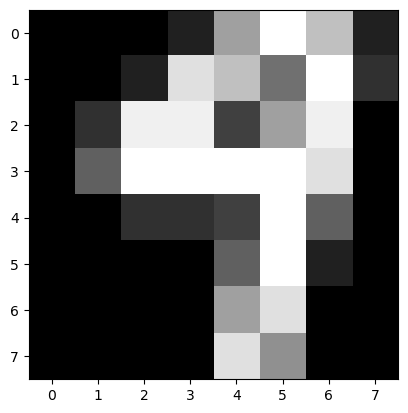

La cifra 2 è stata classificata come cifra 5


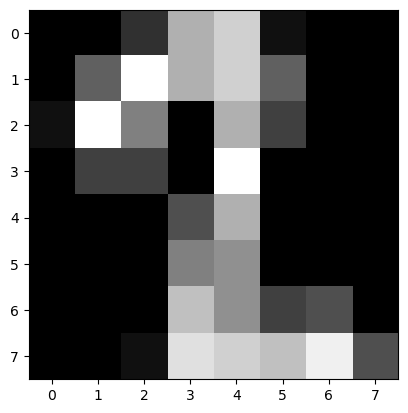

La cifra 9 è stata classificata come cifra 4


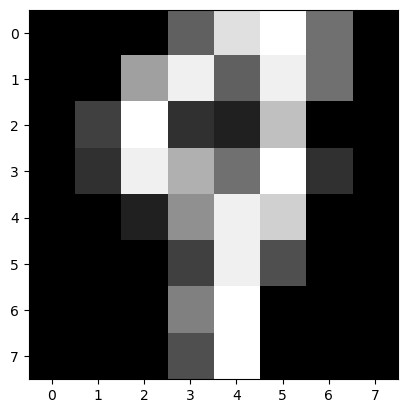

La cifra 1 è stata classificata come cifra 7


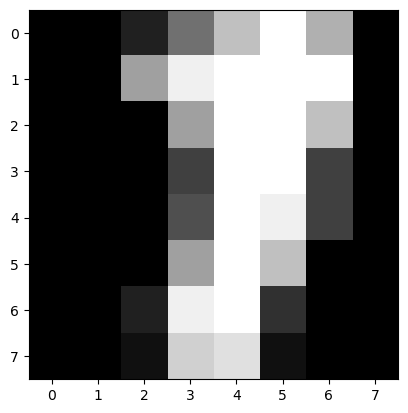

La cifra 3 è stata classificata come cifra 8


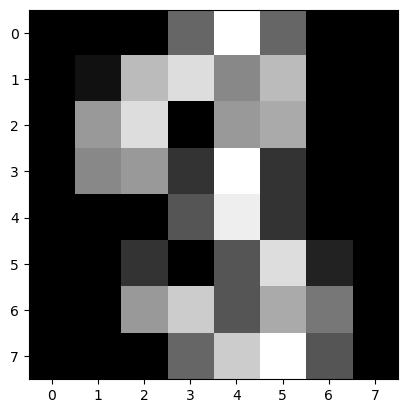

La cifra 9 è stata classificata come cifra 3


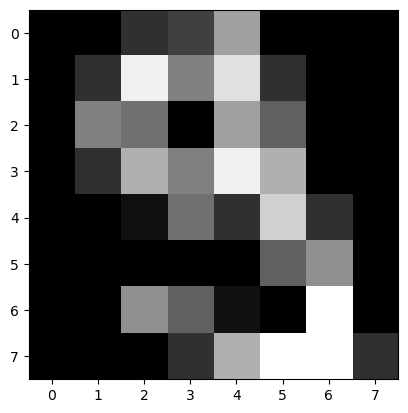

La cifra 2 è stata classificata come cifra 1


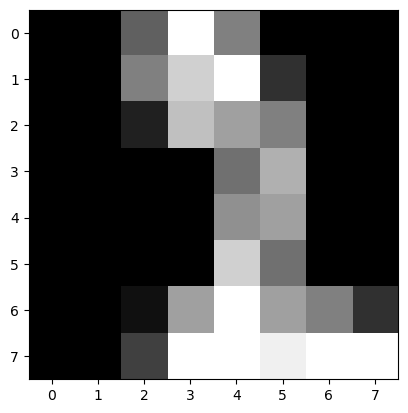

La cifra 7 è stata classificata come cifra 4


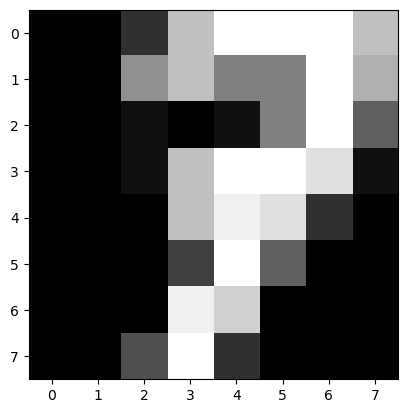

In [4]:
# rieseguo la classificazione con K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_std, Y_train)

# eseguo predizione e calcolo confidenza su test
Y_pred = knn.predict(X_test_std)

# visualizzo le cifre sbagliate
for i in range(0, len(X_test)):
    if Y_pred[i] != Y_test[i]:
        print("La cifra", Y_test[i], "è stata classificata come cifra", Y_pred[i])
        plt.imshow(X_test[i].reshape([8, 8]), cmap="gray")
        plt.show()